In [1]:
#link: url = 'https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/'

In [3]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline 
# This line is necessary for the plot to appear in a Jupyter

#import data reader
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data

In [4]:
# Define the instruments to download. 
#We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

In [5]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

In [48]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('AAPL', 'robinhood', start_date, end_date)

In [49]:
panel_data.head(9)

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-10-27  160.621400  161.163200         False  156.336200   
       2017-10-30  164.236700  165.566600         False  161.281400   
       2017-10-31  166.522200  167.123000         False  164.453400   
       2017-11-01  164.404200  167.408800         False  163.143300   
       2017-11-02  165.606000  165.990200         False  162.818200   
       2017-11-03  169.930600  171.664400         False  168.571200   
       2017-11-06  171.654600  172.383500         False  169.162300   
       2017-11-07  172.206200  172.639700         False  171.014300   
       2017-11-08  173.614900  173.614900         False  171.733400   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-10-27  156.917400     reg  44454160  
       2017-10-30  161.448900     reg  44700772  
       2017-10-31  165.399200     reg  36046828  
       2017-11-01  167.339800     reg  33637762  
       2017-11-02  164.118500     reg  41393373  
       2017-11-03  171.408300     reg  59398631  
       2017-11-06  169.797600     reg  35026306  
       2017-11-07  171.319600     reg  24361485  
       2017-11-08  172.058500     reg  24409527

In [50]:
# Getting just the adjusted closing prices. 
#This will return a Pandas DataFrame
## The index in this DataFrame is the major index of the panel_data.
close = panel_data['close_price']

In [51]:
close.head()

symbol  begins_at 
AAPL    2017-10-27    160.621400
        2017-10-30    164.236700
        2017-10-31    166.522200
        2017-11-01    164.404200
        2017-11-02    165.606000
Name: close_price, dtype: object

In [52]:
close.describe()

count            252
unique           246
top       171.534600
freq               2
Name: close_price, dtype: object

In [55]:
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 252 entries, (AAPL, 2017-10-27 00:00:00) to (AAPL, 2018-10-26 00:00:00)
Data columns (total 7 columns):
close_price     252 non-null object
high_price      252 non-null object
interpolated    252 non-null bool
low_price       252 non-null object
open_price      252 non-null object
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), int64(1), object(5)
memory usage: 15.0+ KB


,symbol,begins_at,close_price
0,AAPL,2017-10-27,160.621400
1,AAPL,2017-10-30,164.236700
2,AAPL,2017-10-31,166.522200
3,AAPL,2017-11-01,164.404200
4,AAPL,2017-11-02,165.606000
5,AAPL,2017-11-03,169.930600
6,AAPL,2017-11-06,171.654600
7,AAPL,2017-11-07,172.206200
8,AAPL,2017-11-08,173.614900
9,AAPL,2017-11-09,173.260300


In [45]:
close2 = close.reindex(all_weekdays)

ValueError: cannot include dtype 'M' in a buffer

In [36]:
close.ix['MSFT']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


KeyError: 'MSFT'

In [60]:
msft_df = data.DataReader('MSFT', 'robinhood', start_date, end_date)

In [61]:
msft = msft_df['close_price']

In [63]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

In [64]:
msft.head()

symbol  begins_at 
MSFT    2017-10-27    82.318900
        2017-10-30    82.397500
        2017-10-31    81.700100
        2017-11-01    81.700100
        2017-11-02    82.554600
Name: close_price, dtype: object

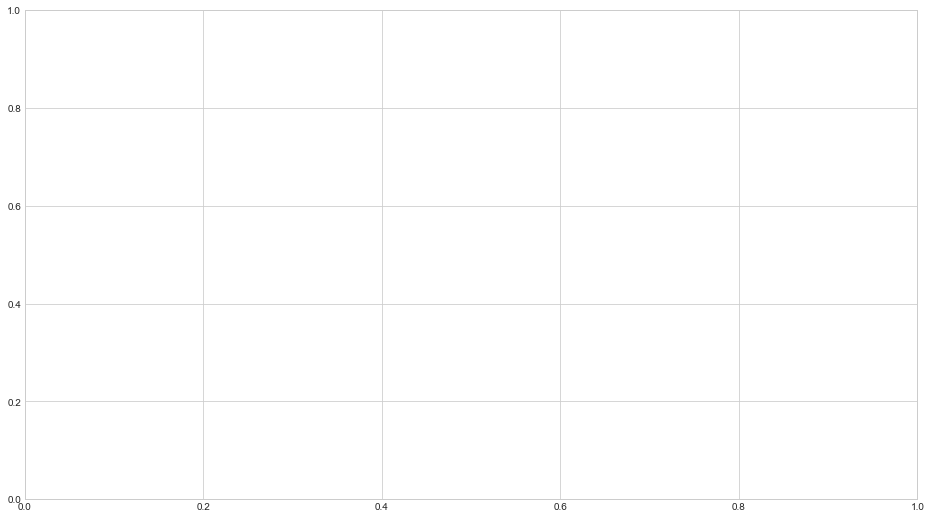

In [68]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))


In [70]:
ax.plot(msft.index, msft, label='MSFT')

TypeError: ('MSFT', Timestamp('2017-10-27 00:00:00')) is not a string

In [76]:
aapl = close.reindex()

In [84]:
new_df = panel_data['close_price']
new_df.head()

symbol  begins_at 
AAPL    2017-10-27    160.621400
        2017-10-30    164.236700
        2017-10-31    166.522200
        2017-11-01    164.404200
        2017-11-02    165.606000
Name: close_price, dtype: object

In [85]:
new_df.reindex()

symbol  begins_at 
AAPL    2017-10-27    160.621400
        2017-10-30    164.236700
        2017-10-31    166.522200
        2017-11-01    164.404200
        2017-11-02    165.606000
        2017-11-03    169.930600
        2017-11-06    171.654600
        2017-11-07    172.206200
        2017-11-08    173.614900
        2017-11-09    173.260300
        2017-11-10    172.686900
        2017-11-13    171.994800
        2017-11-14    169.394700
        2017-11-15    167.160300
        2017-11-16    169.157400
        2017-11-17    168.218200
        2017-11-20    168.050100
        2017-11-21    171.174200
        2017-11-22    172.973600
        2017-11-24    172.983500
        2017-11-27    172.113500
        2017-11-28    171.105000
        2017-11-29    167.555800
        2017-11-30    169.898900
        2017-12-01    169.108000
        2017-12-04    167.872200
        2017-12-05    167.714000
        2017-12-06    167.091100
        2017-12-07    167.397600
        2017-12-08    16

In [86]:
new_df.unstack()

begins_at,2017-10-27 00:00:00,2017-10-30 00:00:00,2017-10-31 00:00:00,2017-11-01 00:00:00,2017-11-02 00:00:00,2017-11-03 00:00:00,2017-11-06 00:00:00,2017-11-07 00:00:00,2017-11-08 00:00:00,2017-11-09 00:00:00,...,2018-10-15 00:00:00,2018-10-16 00:00:00,2018-10-17 00:00:00,2018-10-18 00:00:00,2018-10-19 00:00:00,2018-10-22 00:00:00,2018-10-23 00:00:00,2018-10-24 00:00:00,2018-10-25 00:00:00,2018-10-26 00:00:00
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,160.621400,164.236700,166.522200,164.404200,165.606000,169.930600,171.654600,172.206200,173.614900,173.260300,...,217.360000,222.150000,221.190000,216.020000,219.310000,220.650000,222.730000,215.090000,219.800000,216.300000


In [94]:
new = aapl.reset_index()
new.head()

,symbol,begins_at,close_price
0,AAPL,2017-10-27,160.621400
1,AAPL,2017-10-30,164.236700
2,AAPL,2017-10-31,166.522200
3,AAPL,2017-11-01,164.404200
4,AAPL,2017-11-02,165.606000


In [95]:
new_df = new['close_price']

In [96]:
new_df.head()

0    160.621400
1    164.236700
2    166.522200
3    164.404200
4    165.606000
Name: close_price, dtype: object

In [107]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B'

SyntaxError: unexpected EOF while parsing (<ipython-input-107-19c144306be7>, line 1)

In [102]:

new_df = new_df.reindex(all_weekdays)

new_df.head()

2010-01-01    NaN
2010-01-04    NaN
2010-01-05    NaN
2010-01-06    NaN
2010-01-07    NaN
2010-01-08    NaN
2010-01-11    NaN
2010-01-12    NaN
2010-01-13    NaN
2010-01-14    NaN
2010-01-15    NaN
2010-01-18    NaN
2010-01-19    NaN
2010-01-20    NaN
2010-01-21    NaN
2010-01-22    NaN
2010-01-25    NaN
2010-01-26    NaN
2010-01-27    NaN
2010-01-28    NaN
2010-01-29    NaN
2010-02-01    NaN
2010-02-02    NaN
2010-02-03    NaN
2010-02-04    NaN
2010-02-05    NaN
2010-02-08    NaN
2010-02-09    NaN
2010-02-10    NaN
2010-02-11    NaN
             ... 
2016-11-21    NaN
2016-11-22    NaN
2016-11-23    NaN
2016-11-24    NaN
2016-11-25    NaN
2016-11-28    NaN
2016-11-29    NaN
2016-11-30    NaN
2016-12-01    NaN
2016-12-02    NaN
2016-12-05    NaN
2016-12-06    NaN
2016-12-07    NaN
2016-12-08    NaN
2016-12-09    NaN
2016-12-12    NaN
2016-12-13    NaN
2016-12-14    NaN
2016-12-15    NaN
2016-12-16    NaN
2016-12-19    NaN
2016-12-20    NaN
2016-12-21    NaN
2016-12-22    NaN
2016-12-23

In [103]:
new.describe()

,symbol,begins_at,close_price
count,252,252,252
unique,1,252,246
top,AAPL,2017-10-30 00:00:00,171.534600
freq,252,1,2
first,NaN,2017-10-27 00:00:00,NaN
last,NaN,2018-10-26 00:00:00,NaN
